# Herbiera

In [1]:
## Import des librairies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import keras
import sklearn
import sklearn.metrics
import seaborn


2022-12-03 17:09:56.462070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 17:09:56.765064: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-03 17:09:56.824812: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 17:09:56.824835: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
## Load Image
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (375, 500))
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rotation = cv2.rotate(img, cv2.ROTATE_180)
    flip = cv2.flip(img, 1)
    rotation_flip = cv2.flip(rotation, 1)
    return img, rotation, flip, rotation_flip

## Import des données
def load_images_from_folder(folder):
    train_x, train_y, test_x, test_y = ([], [], [], [])
    aug_train_x, aug_train_y, aug_test_x, aug_test_y = ([], [], [], [])
    count_files = 0
    for _, _, files in os.walk(folder):
        count_files += len(files)
    count = 0
    # Load Train Set
    for specie in os.listdir(folder+'/Train'):
        for image in os.listdir(folder+'/Train/'+specie):
            count += 1
            print('Loading Images: ' + str(count) + '/' + str(count_files))
            img, rotation, flip, rotation_flip = load_image(folder+'/Train/'+specie+'/'+image)
            if img is not None:
                train_x.append(img)
                aug_train_x.append(rotation)
                aug_train_x.append(flip)
                aug_train_x.append(rotation_flip)
                train_y.append(specie)
                aug_train_y.append(specie)
                aug_train_y.append(specie)
                aug_train_y.append(specie)
    # Load Test Set
    for specie in os.listdir(folder+'/Test'):
        for image in os.listdir(folder+'/Test/'+specie):
            count += 1
            print('Loading Images: ' + str(count) + '/' + str(count_files))
            img, rotation, flip, rotation_flip = load_image(folder+'/Test/'+specie+'/'+image)
            if img is not None:
                test_x.append(img)
                aug_test_x.append(rotation)
                aug_test_x.append(flip)
                aug_test_x.append(rotation_flip)
                test_y.append(specie)
                aug_test_y.append(specie)
                aug_test_y.append(specie)
                aug_test_y.append(specie)
    aug_test_x = test_x + aug_test_x
    aug_test_y = test_y + aug_test_y
    aug_train_x = train_x + aug_train_x
    aug_train_y = train_y + aug_train_y
    return train_x, train_y, test_x, test_y, aug_train_x, aug_train_y, aug_test_x, aug_test_y

## Load images
train_x, train_y, test_x, test_y, aug_train_x, aug_train_y, aug_test_x, aug_test_y = load_images_from_folder('dataset')
# aug_train_y, aug_test_x, aug_test_y

Loading Images: 1/330
Loading Images: 2/330
Loading Images: 3/330
Loading Images: 4/330
Loading Images: 5/330
Loading Images: 6/330
Loading Images: 7/330
Loading Images: 8/330
Loading Images: 9/330
Loading Images: 10/330
Loading Images: 11/330
Loading Images: 12/330
Loading Images: 13/330
Loading Images: 14/330
Loading Images: 15/330
Loading Images: 16/330
Loading Images: 17/330
Loading Images: 18/330
Loading Images: 19/330
Loading Images: 20/330
Loading Images: 21/330
Loading Images: 22/330
Loading Images: 23/330
Loading Images: 24/330
Loading Images: 25/330
Loading Images: 26/330
Loading Images: 27/330
Loading Images: 28/330
Loading Images: 29/330
Loading Images: 30/330
Loading Images: 31/330
Loading Images: 32/330
Loading Images: 33/330
Loading Images: 34/330
Loading Images: 35/330
Loading Images: 36/330
Loading Images: 37/330
Loading Images: 38/330
Loading Images: 39/330
Loading Images: 40/330
Loading Images: 41/330
Loading Images: 42/330
Loading Images: 43/330
Loading Images: 44/3

IndexError: list index out of range

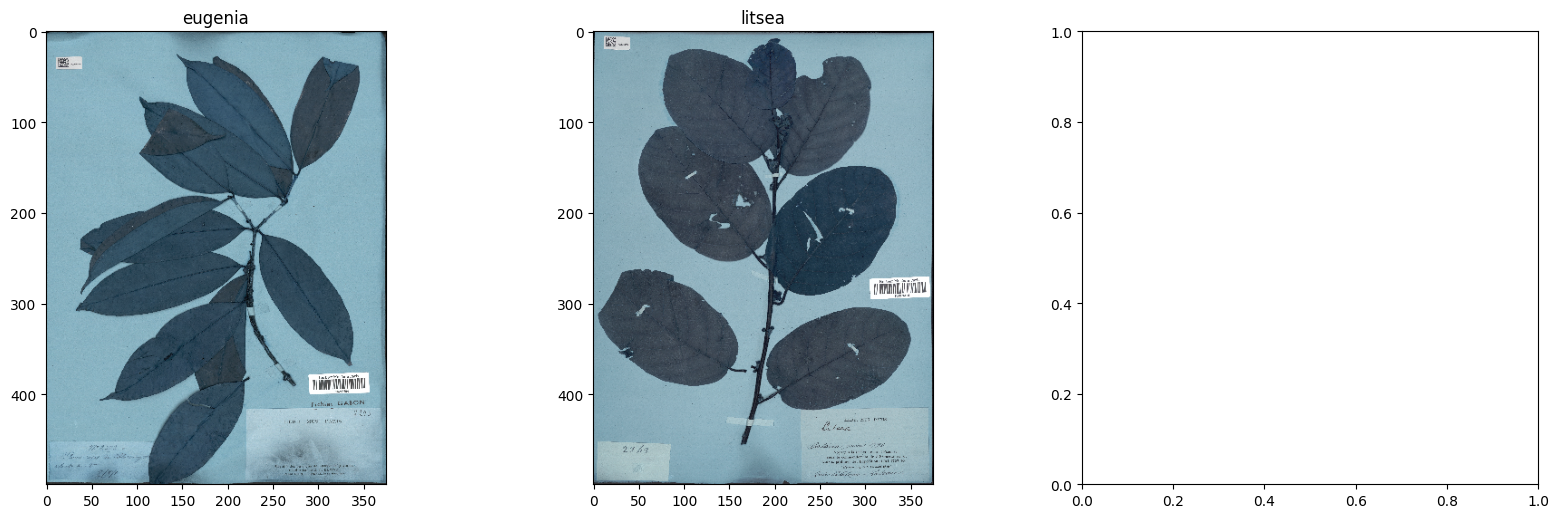

In [3]:
## Afficher 9 images aléatoires
def show_random_images(images, labels):
    fig = plt.figure(figsize=(20, 20))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i+1)
        index = random.randint(0, len(images))
        ax.imshow(images[index])
        ax.set_title(labels[index])
    plt.show()

## Afficher les images
show_random_images(train_x, train_y)

In [4]:
## Création du modèle
## Find the class of an image using a CNN
model = Sequential()
model.add(Conv2D(1, kernel_size=3, activation='relu', input_shape=(500, 375, 3)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

## Compilation du modèle
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.02), loss='mean_squared_error', metrics=['accuracy'])

## Afficher le résumé du modèle
model.summary()

## convertir les labels en vecteurs
def convert_labels(labels):
    new_labels = []
    unique_labels = list(set(labels))
    for label in labels:
        vector = [0] * len(unique_labels)
        vector[unique_labels.index(label)] = 1
        new_labels.append(vector)
    return new_labels

# def convert_to_numeric(labels):
#     unique = list(set(labels))
#     numeric_labels = []
#     for label in labels:
#         numeric_labels.append([unique.index(label)])
#     return numeric_labels

## Fit du modèle
model.fit(np.array(aug_train_x), np.array(convert_labels(aug_train_y)), epochs=50, batch_size=32,  validation_data=(np.array(test_x), np.array(convert_labels(test_y))))

def analyze_preds(preds, labels):
  confusion_matrix = sklearn.metrics.confusion_matrix(preds,
                                                      labels,
                                                      normalize="true")
  seaborn.heatmap(confusion_matrix,
                  cmap="rocket_r")
  plt.title("Matrice de confusion")
  plt.show()


test_pred = np.argmax(model.predict(np.array(test_x)), axis=-1)
analyze_preds(test_pred, np.argmax(np.array(convert_labels(test_y)), axis=-1))

2022-12-03 17:11:56.194688: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/Herbiera/venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-03 17:11:56.195274: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 17:11:56.195300: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HonorLaptop): /proc/driver/nvidia/version does not exist
2022-12-03 17:11:56.197261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 373, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 186, 1)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 249, 186, 1)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 184, 16)      160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 92, 16)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 123, 92, 16)       0